# MLR Practice

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as metrics

from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

from scipy import stats as stats

%matplotlib inline

### Data

Bike share data set.

[More Info](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [3]:
df = pd.read_csv('./data/day.csv')

In [4]:
df.columns = [name.strip().lower() for name in df.columns]

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
# Forces a show of non-null counts WITHOUT deprecating/truncating the table
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [24]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
df.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [26]:
df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

In [27]:
df.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

## Dummy!

### `OneHotEncoder()`

In [28]:
# instantiate OHE
ohe = OneHotEncoder(drop='first')

In [29]:
# fit and transform
season_dummy = ohe.fit_transform(df[['season']])

In [30]:
# examine
season_dummy.todense()

matrix([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [31]:
season_df = pd.DataFrame(season_dummy.todense(), columns=['season2','season3','season4'])

In [32]:
season_df.head()

,season2,season3,season4
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [33]:
dum_df = df.merge(season_df, left_index=True, right_index=True).drop(columns=['season'])

In [34]:
dum_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season2,season3,season4
0,1,2011-01-01,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.0,0.0,0.0
1,2,2011-01-02,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.0,0.0,0.0
2,3,2011-01-03,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.0,0.0,0.0
3,4,2011-01-04,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.0,0.0,0.0
4,5,2011-01-05,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.0,0.0,0.0


### `pd.get_dummies`

In [35]:
dum2_df = pd.get_dummies(df, columns=['season'], drop_first=True)

In [61]:
dum2_df.describe()['cnt']

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

## Scaling!

In [39]:
ss = StandardScaler()

In [43]:
target = dum2_df['cnt']
preds_continuous = dum2_df[['temp','atemp','hum','windspeed','casual','registered']]
preds_categorical = dum2_df[['season_2','season_3','season_4']]

In [49]:
preds_continuous_scaled = ss.fit_transform(preds_continuous)
preds_categorical_scaled = ss.fit_transform(preds_categorical)

In [51]:
preds_continuous_scaled

array([[-0.82666213, -0.67994602,  1.25017133, -0.38789169, -0.7537338 ,
        -1.9254707 ],
       [-0.72109471, -0.74065231,  0.47911298,  0.74960172, -1.04521412,
        -1.91520896],
       [-1.63465665, -1.749767  , -1.33927398,  0.74663186, -1.06124554,
        -1.5566892 ],
       ...,
       [-1.32322427, -1.42434419,  0.87839173, -0.85355213, -1.00440687,
        -1.58683308],
       [-1.30955752, -1.49004895, -1.01566357,  2.06944426, -0.70563955,
        -1.42649329],
       [-1.52822548, -1.54048197, -0.35406086, -0.46020122, -0.59633443,
        -0.87620714]])

In [52]:
preds_categorical_scaled

array([[-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527],
       ...,
       [-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527]])

In [53]:
lr = LinearRegression()
lr.fit(preds_categorical_scaled,target)

LinearRegression()

In [54]:
lr.coef_

array([1036.46751803, 1328.79937928,  911.62432017])

In [57]:
lr.score(preds_categorical_scaled, target)

0.34699163632566543

In [94]:
y_hat = lr.predict(preds_categorical)
y_hat

array([4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883721,
       4504.34883721, 4504.34883721, 4504.34883721, 4504.34883

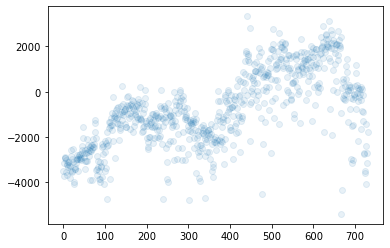

In [95]:
resid = (target - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

In [63]:
metrics.mean_squared_error(target, lr.predict(preds_categorical_scaled))

2447249.6902711615

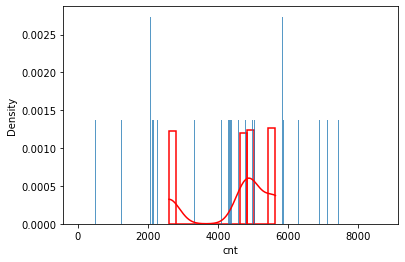

In [88]:
sns.histplot(y_hat,kde=True,fill=False,stat='density',color='red')
sns.histplot(target,discrete=True,stat='density');

In [72]:
preds_categorical_scaled

array([[-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527],
       ...,
       [-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527],
       [-0.57998298, -0.5884086 , -0.56734527]])

In [89]:
model = sm.OLS(target,preds_categorical_scaled).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.054
Model:                            OLS   Adj. R-squared (uncentered):              0.050
Method:                 Least Squares   F-statistic:                              13.88
Date:                Tue, 22 Mar 2022   Prob (F-statistic):                    8.27e-09
Time:                        16:21:29   Log-Likelihood:                         -7228.6
No. Observations:                 731   AIC:                                  1.446e+04
Df Residuals:                     728   BIC:                                  1.448e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1036.4675    217.089      4.774      0.000     610.273    1462.662
x2          1328.7994    217.476      6.110      0.000     901.845    1755.753
x3           911.6243    216.475      4.211      0.000     486.635    1336.613
==============================================================================
Omnibus:                        3.050   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.765
Skew:                           0.080   Prob(JB):                        0.251
Kurtosis:                       2.745   Cond. No.                         2.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='cnt', ylabel='Count'>

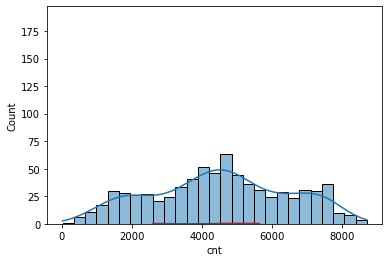

In [87]:
bins = int( len(target)**.5)
sns.histplot(data=target, bins=bins, kde=True)
sns.histplot(data=y_hat, bins=bins, kde=True,color = 'r')

In [84]:
y_hat

array([2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259669,
       2604.13259669, 2604.13259669, 2604.13259669, 2604.13259

In [91]:
resid

0     -1619.132597
1     -1803.132597
2     -1255.132597
3     -1042.132597
4     -1004.132597
          ...     
726    -490.132597
727     490.867403
728   -1263.132597
729    -808.132597
730     124.867403
Name: cnt, Length: 731, dtype: float64